In [9]:
from fastai.vision import *
import os,sys

In [10]:
path = os.path.abspath('../../data/imageClassify')
path

'/Users/origami/Desktop/dl-projects/dl-playground/data/imageClassify'

In [11]:
df = pd.read_csv(path+'/list_attr_celeba_fixed.csv')
df.head()

,image_id,label
0,000001.jpg,Arched_Eyebrows Attractive Brown_Hair Heavy_Ma...
1,000002.jpg,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheek...
2,000003.jpg,Big_Lips Blurry Male Narrow_Eyes No_Beard Poin...
3,000004.jpg,Attractive No_Beard Pointy_Nose Straight_Hair ...
4,000005.jpg,Arched_Eyebrows Attractive Big_Lips Heavy_Make...


In [12]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [17]:
doc(ImageList.from_csv)

In [21]:
np.random.seed(42)
src = (ImageList.from_csv(path,'list_attr_celeba_fixed.csv',folder='img_align_celeba')
      .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [22]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

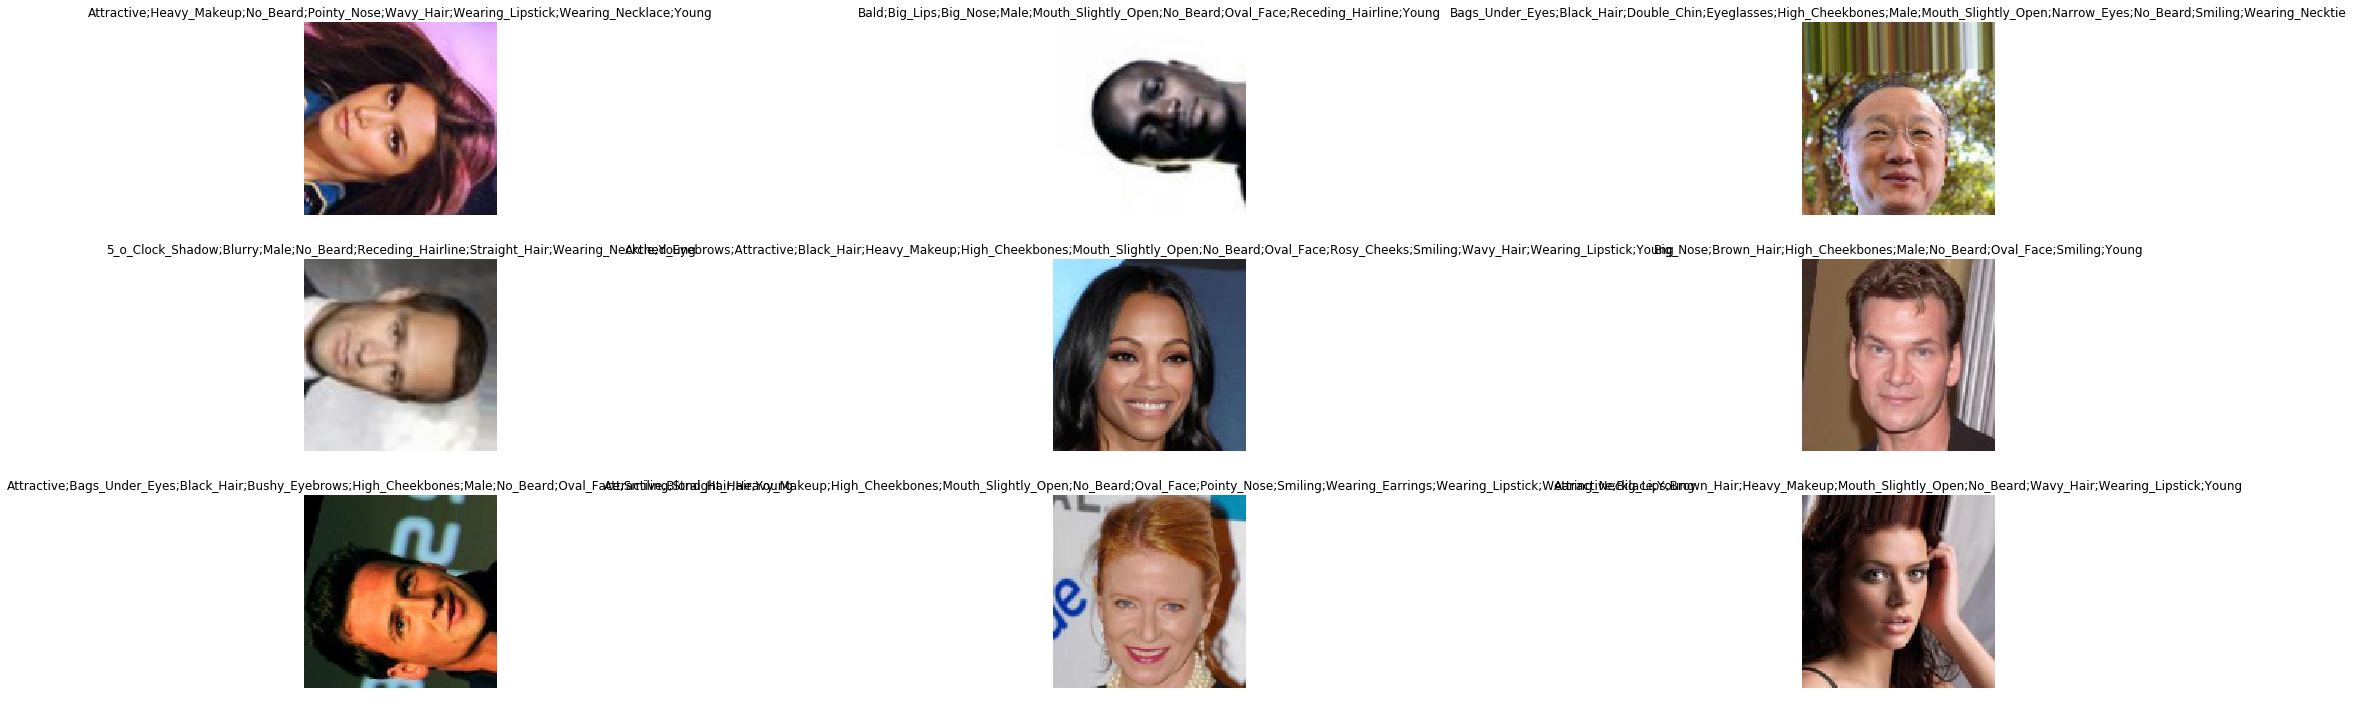

In [31]:
data.show_batch(rows=3, figsize=(30,10))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['5_o_Clock_Shadow',
  'Arched_Eyebrows',
  'Attractive',
  'Bags_Under_Eyes',
  'Bald',
  'Bangs',
  'Big_Lips',
  'Big_Nose',
  'Black_Hair',
  'Blond_Hair',
  'Blurry',
  'Brown_Hair',
  'Bushy_Eyebrows',
  'Chubby',
  'Double_Chin',
  'Eyeglasses',
  'Goatee',
  'Gray_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'Male',
  'Mouth_Slightly_Open',
  'Mustache',
  'Narrow_Eyes',
  'No_Beard',
  'Oval_Face',
  'Pale_Skin',
  'Pointy_Nose',
  'Receding_Hairline',
  'Rosy_Cheeks',
  'Sideburns',
  'Smiling',
  'Straight_Hair',
  'Wavy_Hair',
  'Wearing_Earrings',
  'Wearing_Hat',
  'Wearing_Lipstick',
  'Wearing_Necklace',
  'Wearing_Necktie',
  'Young'],
 40,
 162080,
 40519)

In [33]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=error_rate)

In [34]:
learn.lr_find()

Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/miniconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/miniconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/miniconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/miniconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/miniconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/miniconda3/lib/python3.7/multiprocessing/connecti

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 